In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# hearing = 'normal'
# without_ic = True

# sim_name = f'200cells-SF0.19-FInt0.016-FIC0.05-ICF0.05-ICInt0.05-IntF0.0045-0.55nA-full_network-{hearing}'

# if without_ic:
#     sim_name += '-no_IC'

# sim_dir = os.path.join('/Users/katedoxey/Desktop/research/projects/tinnitus/code/tinnitus_model/output/fully_connected-data', sim_name)
# data_path = os.path.join(sim_dir, f'{sim_name}-tinnitus_small_net_data.pkl')
# data = pd.read_pickle(data_path)


In [ ]:
# simData = data['simData']
# vs = simData['V_soma']
# spkt = np.array(simData['spkt'])
# spkid = np.array(simData['spkid'])


In [9]:
hearings = ['normal', 'loss']
without_ic = True
sim_data = {}

colors = ['tab:blue', 'tab:purple']

for row_i, hearing in enumerate(hearings):
    sim_name = f'200cells-SF0.19-FInt0.016-FIC0.05-ICF0.07-ICInt0.05-IntF0.0045-0.55nA-full_network-{hearing}'

    if without_ic:
        sim_name += '-no_IC'

    sim_dir = os.path.join('/Users/katedoxey/Desktop/research/projects/tinnitus/code/tinnitus_model/output/fully_connected-data', sim_name)
    data_path = os.path.join(sim_dir, f'{sim_name}-tinnitus_small_net_data.pkl')
    data = pd.read_pickle(data_path)

    simData = data['simData']
    vs = simData['V_soma']
    spkt = np.array(simData['spkt'])
    spkid = np.array(simData['spkid'])

    sim_data[hearing] = {'vs': vs,
                         'spkt': spkt,
                         'spkid': spkid}

    


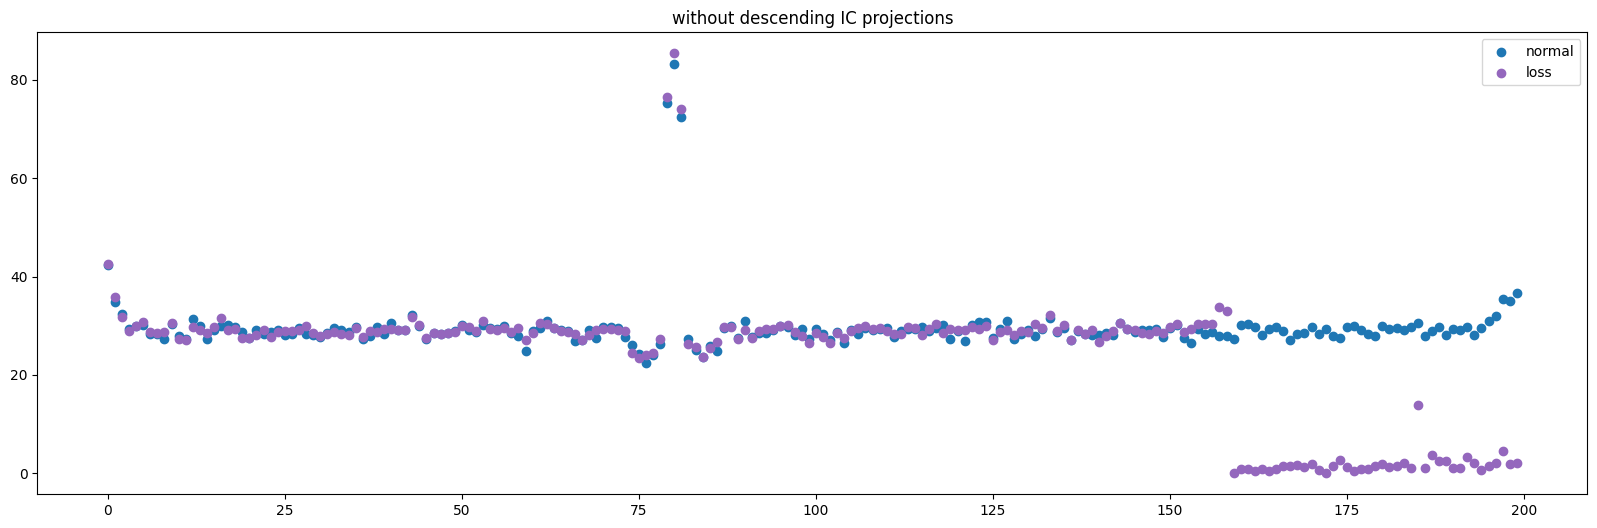

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
# axs.ravel()

colors = ['tab:blue', 'tab:purple']

for row_i, hearing in enumerate(hearings):

    vs = sim_data[hearing]['vs']
    spkt = sim_data[hearing]['spkt']
    spkid = sim_data[hearing]['spkid']

    for i, cell_label in enumerate(vs.keys()):

        if ('dict' in cell_label) or ('pandas' in cell_label):
            break

        # print(i, cell_label)
        gid = int(cell_label.split('_')[1])

        spike_times = spkt[np.where(spkid == gid)]
        msf = (len(spike_times) - 1) / (spike_times[-1] - spike_times[0]) * 1000 if len(spike_times) > 1 else 0

        if i == 0:
            axs.scatter(i, msf, color=colors[row_i], label=hearing)
        else:
            axs.scatter(i, msf, color=colors[row_i])

axs.legend(loc='upper right')
axs.set_title('without descending IC projections')
fig.savefig(f'{sim_name}-f_rates.png', dpi=300)


In [11]:
hearings = ['normal', 'loss']
without_ic = False
sim_data_ic = {}

colors = ['tab:blue', 'tab:purple']

for row_i, hearing in enumerate(hearings):
    sim_name = f'200cells-SF0.19-FInt0.016-FIC0.05-ICF0.07-ICInt0.05-IntF0.0045-0.55nA-full_network-{hearing}'

    if without_ic:
        sim_name += '-no_IC'

    sim_dir = os.path.join('/Users/katedoxey/Desktop/research/projects/tinnitus/code/tinnitus_model/output/fully_connected-data', sim_name)
    data_path = os.path.join(sim_dir, f'{sim_name}-tinnitus_small_net_data.pkl')
    data = pd.read_pickle(data_path)

    simData = data['simData']
    vs = simData['V_soma']
    spkt = np.array(simData['spkt'])
    spkid = np.array(simData['spkid'])

    sim_data_ic[hearing] = {'vs': vs,
                            'spkt': spkt,
                            'spkid': spkid}

    


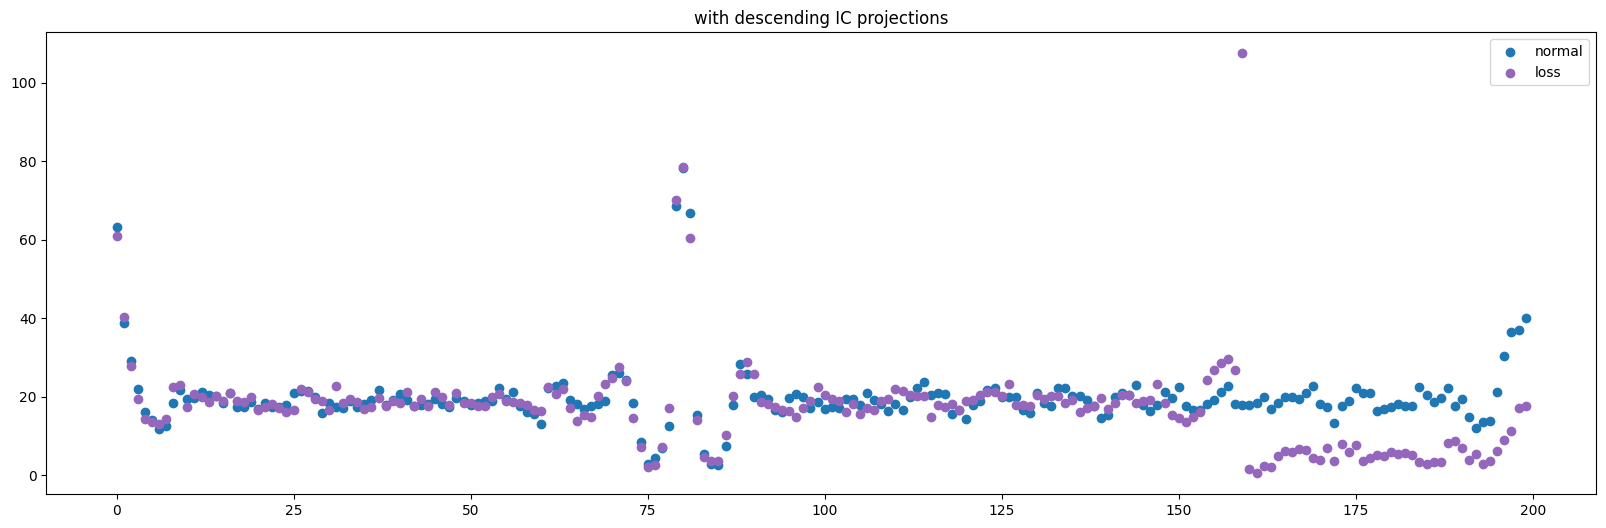

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
# axs.ravel()

colors = ['tab:blue', 'tab:purple']

for row_i, hearing in enumerate(hearings):

    vs = sim_data_ic[hearing]['vs']
    spkt = sim_data_ic[hearing]['spkt']
    spkid = sim_data_ic[hearing]['spkid']

    for i, cell_label in enumerate(vs.keys()):

        if ('dict' in cell_label) or ('pandas' in cell_label):
            break

        # print(i, cell_label)
        gid = int(cell_label.split('_')[1])

        spike_times = spkt[np.where(spkid == gid)]
        msf = (len(spike_times) - 1) / (spike_times[-1] - spike_times[0]) * 1000 if len(spike_times) > 1 else 0

        if i == 0:
            axs.scatter(i, msf, color=colors[row_i], label=hearing)
        else:
            axs.scatter(i, msf, color=colors[row_i])

axs.legend(loc='upper right')
axs.set_title('with descending IC projections')
fig.savefig(f'{sim_name}-f_rates.png', dpi=300)